### importing the necessary libraries that are required

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import StandardScaler

### loading the dataset

In [35]:
dataset = pd.read_csv("/Users/snehaaadhikari/Desktop/students_data.csv")

In [36]:
# displaying the first few rows of the dataset
print(dataset.head())

   StudentID  Semester1_Marks  Semester2_Marks  Semester3_Marks  \
0       1101               45               55               60   
1       1102               65               70               80   
2       1103               88               77               90   
3       1104               56               70               65   
4       1105               45               42               50   

   Semester4_Marks  Semester5_Marks  Semester6_Marks  Total_GPA  \
0               48               50               49       2.30   
1               72               68               55       2.71   
2               85               75               83       3.15   
3               72               62               68       2.83   
4               49               55               48       2.60   

   Attendance_Sem1  Attendance_Sem2  Attendance_Sem3  Attendance_Sem4  \
0               45               50               55               48   
1               60               65             

In [37]:
# basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudentID         50 non-null     int64  
 1   Semester1_Marks   50 non-null     int64  
 2   Semester2_Marks   50 non-null     int64  
 3   Semester3_Marks   50 non-null     int64  
 4   Semester4_Marks   50 non-null     int64  
 5   Semester5_Marks   50 non-null     int64  
 6   Semester6_Marks   50 non-null     int64  
 7   Total_GPA         50 non-null     float64
 8   Attendance_Sem1   50 non-null     int64  
 9   Attendance_Sem2   50 non-null     int64  
 10  Attendance_Sem3   50 non-null     int64  
 11  Attendance_Sem4   50 non-null     int64  
 12  Attendance_Sem5   50 non-null     int64  
 13  Attendance_Sem6   50 non-null     int64  
 14  Total_Attendance  50 non-null     object 
dtypes: float64(1), int64(13), object(1)
memory usage: 6.0+ KB
None


In [38]:
# Summary statistics
print(dataset.describe())

        StudentID  Semester1_Marks  Semester2_Marks  Semester3_Marks  \
count    50.00000        50.000000        50.000000        50.000000   
mean   1125.50000        67.740000        69.460000        71.300000   
std      14.57738        14.167813        13.456218        10.228512   
min    1101.00000        45.000000        42.000000        50.000000   
25%    1113.25000        56.000000        59.250000        65.000000   
50%    1125.50000        65.500000        70.000000        74.000000   
75%    1137.75000        80.000000        82.000000        79.750000   
max    1150.00000        90.000000        90.000000        90.000000   

       Semester4_Marks  Semester5_Marks  Semester6_Marks  Total_GPA  \
count        50.000000        50.000000        50.000000  50.000000   
mean         68.020000        66.860000        65.380000   2.793000   
std          14.343441        10.571448        14.985558   0.259641   
min          42.000000        45.000000        40.000000   2.300000

### checking for missing values

In [39]:
missing_values = dataset.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
StudentID           0
Semester1_Marks     0
Semester2_Marks     0
Semester3_Marks     0
Semester4_Marks     0
Semester5_Marks     0
Semester6_Marks     0
Total_GPA           0
Attendance_Sem1     0
Attendance_Sem2     0
Attendance_Sem3     0
Attendance_Sem4     0
Attendance_Sem5     0
Attendance_Sem6     0
Total_Attendance    0
dtype: int64


In [40]:
# Replace infinite values with NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
# Remove '%' sign and convert 'Total_Attendance' to float
dataset['Total_Attendance'] = dataset['Total_Attendance'].str.rstrip('%').astype(float)

In [42]:
# Fill missing values with the median of each column
dataset.fillna(dataset.median(), inplace=True)

In [43]:
# Verify no missing values remain
missing_values_after = dataset.isnull().sum()
print(f"Missing values after filling:\n{missing_values_after}")

Missing values after filling:
StudentID           0
Semester1_Marks     0
Semester2_Marks     0
Semester3_Marks     0
Semester4_Marks     0
Semester5_Marks     0
Semester6_Marks     0
Total_GPA           0
Attendance_Sem1     0
Attendance_Sem2     0
Attendance_Sem3     0
Attendance_Sem4     0
Attendance_Sem5     0
Attendance_Sem6     0
Total_Attendance    0
dtype: int64


## DATA VIZUALIZATION

### distribution plots

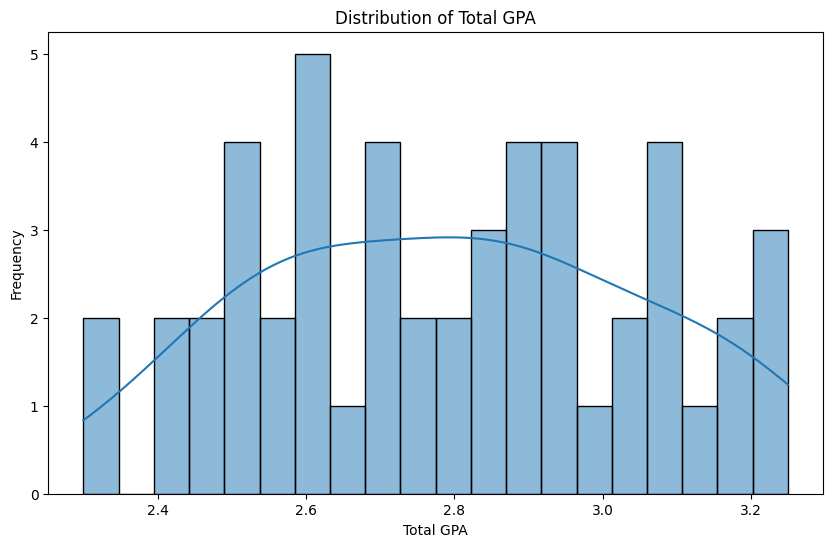

In [44]:
# Distribution of Total GPA
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Total_GPA'], bins=20, kde=True)
plt.title('Distribution of Total GPA')
plt.xlabel('Total GPA')
plt.ylabel('Frequency')
plt.show()

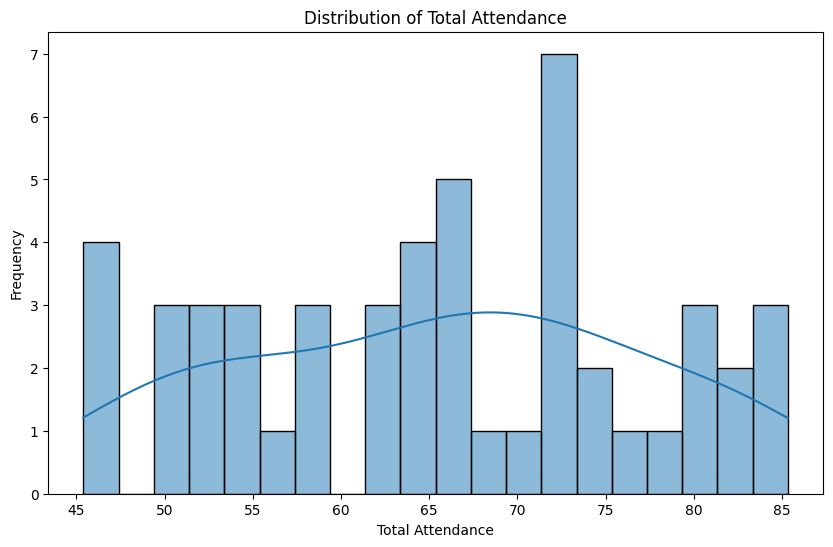

In [45]:
# Distribution of Total Attendance
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Total_Attendance'], bins=20, kde=True)
plt.title('Distribution of Total Attendance')
plt.xlabel('Total Attendance')
plt.ylabel('Frequency')
plt.show()

### pair plot

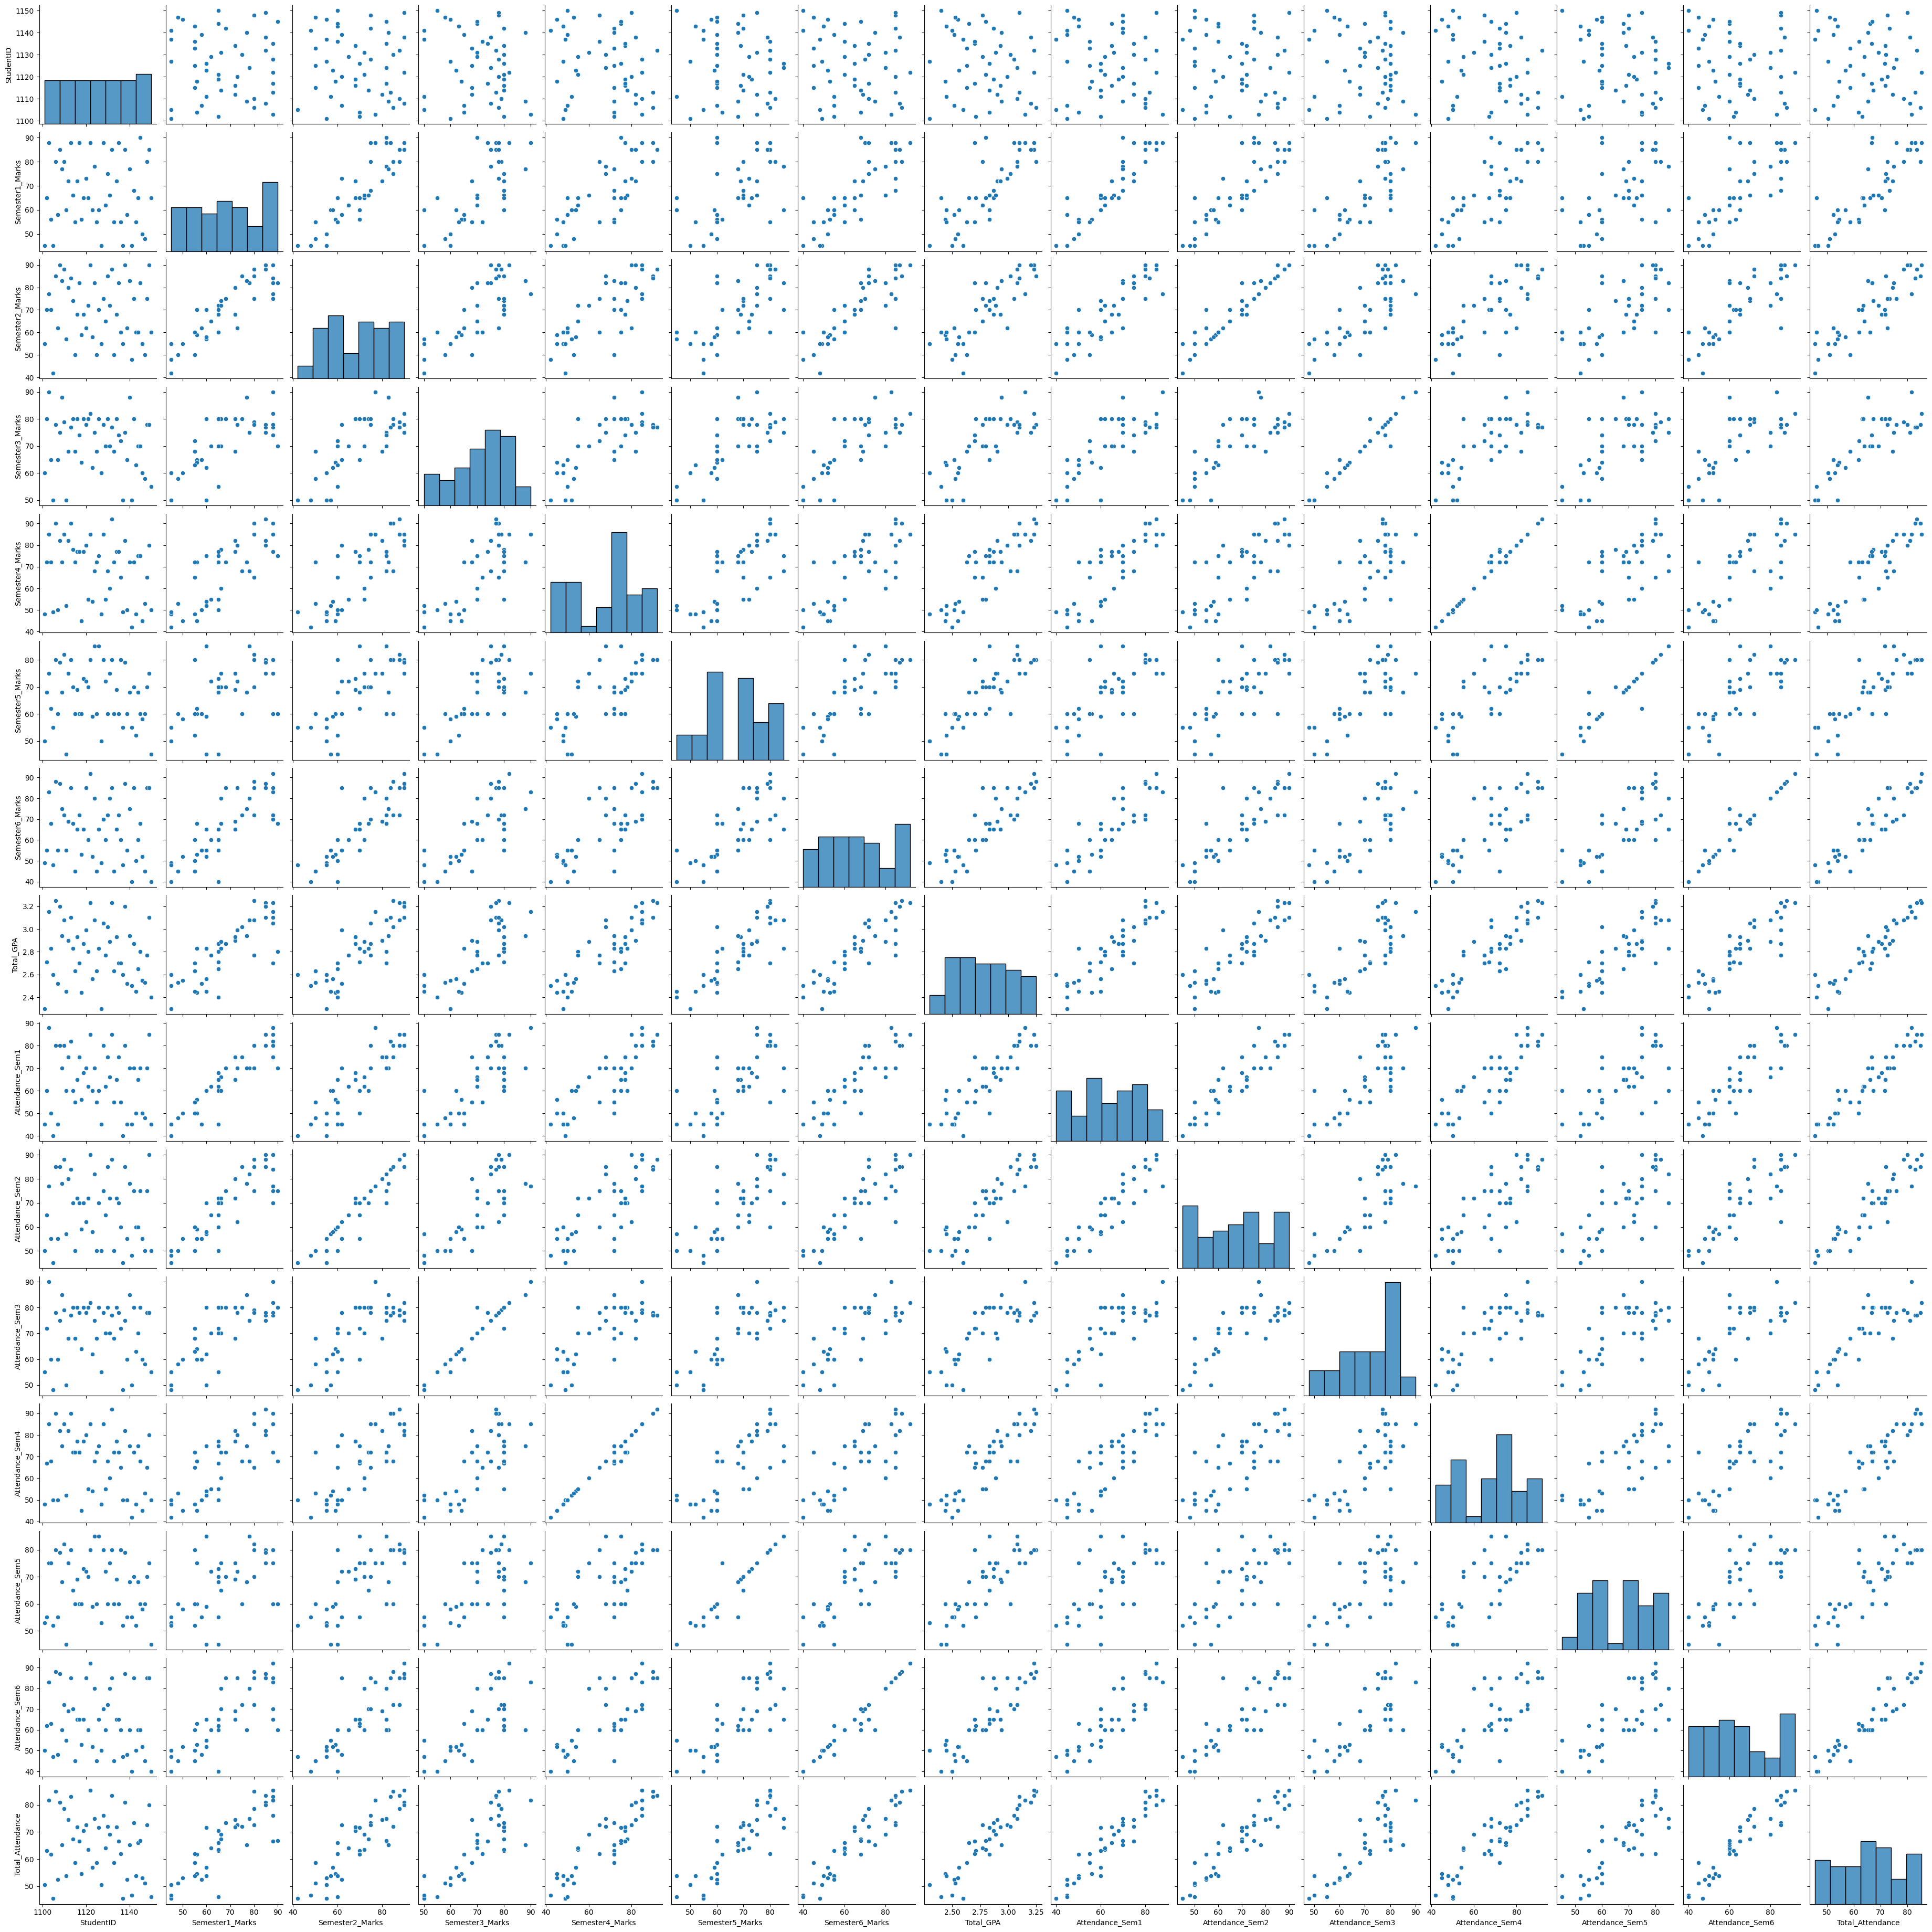

In [46]:
# Pair plot to visualize relationships between features
sns.pairplot(dataset)
plt.show()

### correlation heatmap

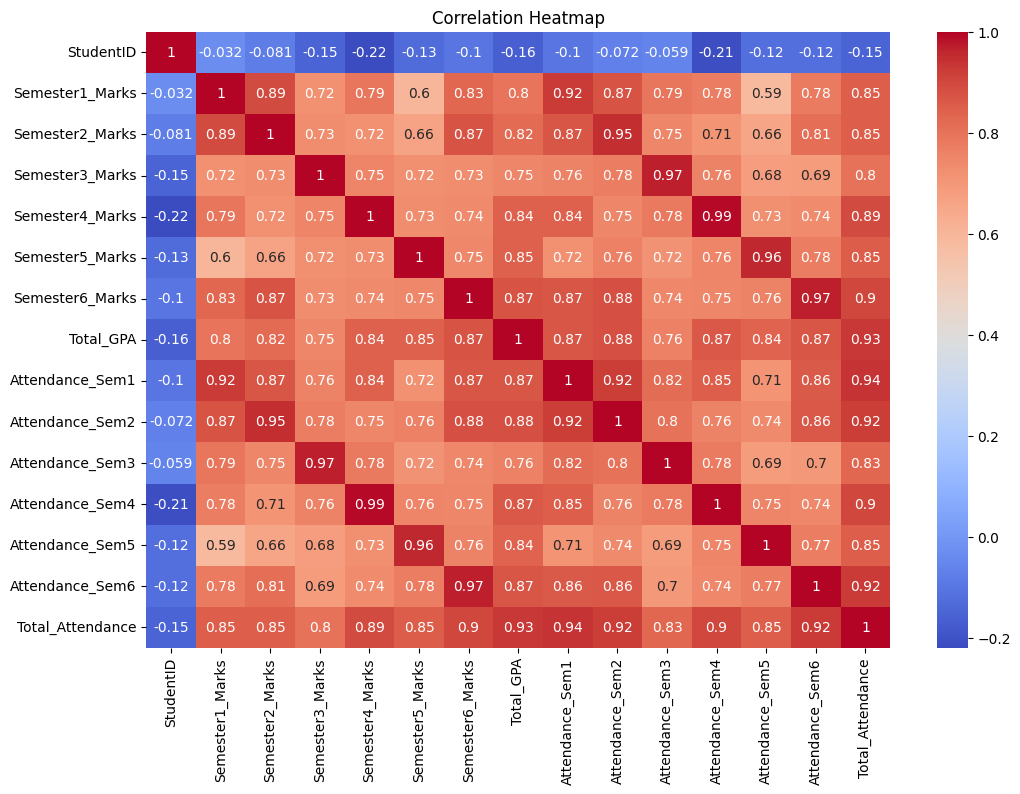

In [47]:

plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### box plots

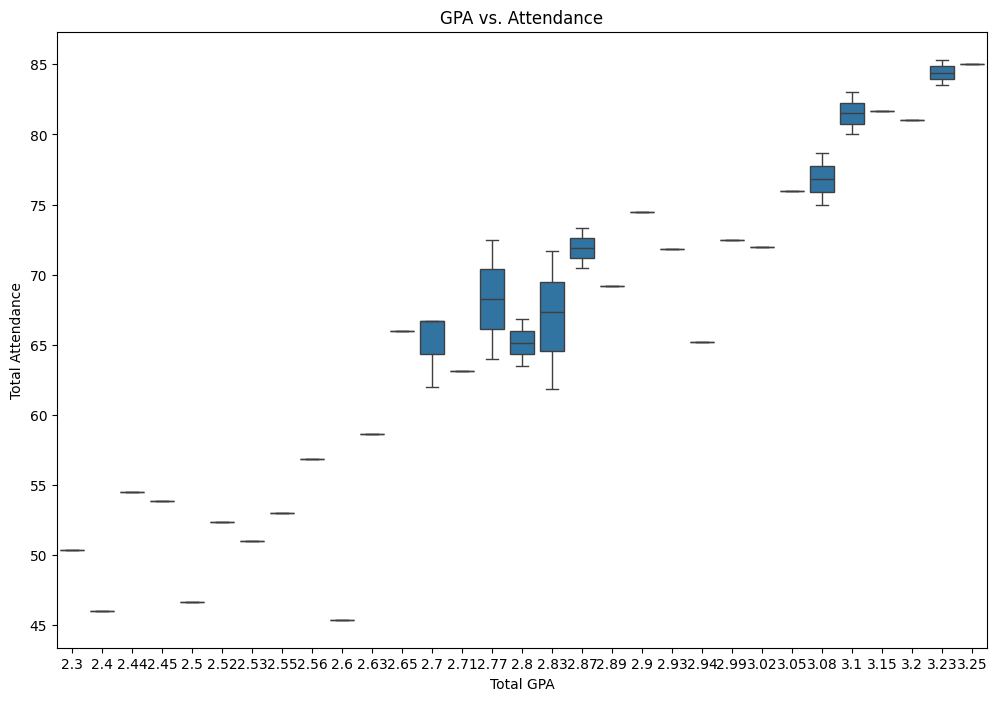

In [48]:
# Box plot for GPA vs. Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x='Total_GPA', y='Total_Attendance', data=dataset)
plt.title('GPA vs. Attendance')
plt.xlabel('Total GPA')
plt.ylabel('Total Attendance')
plt.show()

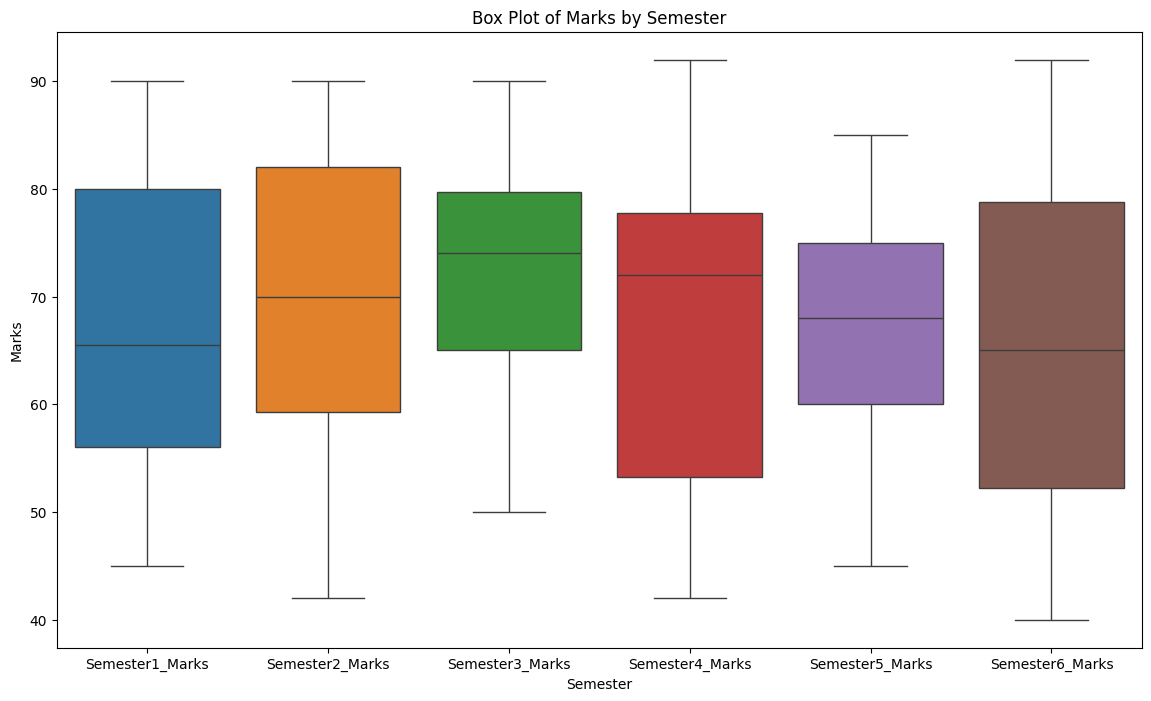

In [49]:
# Box plots for GPA by semester
plt.figure(figsize=(14, 8))
sns.boxplot(data=dataset[['Semester1_Marks', 'Semester2_Marks', 'Semester3_Marks', 'Semester4_Marks', 'Semester5_Marks', 'Semester6_Marks']])
plt.title('Box Plot of Marks by Semester')
plt.xlabel('Semester')
plt.ylabel('Marks')
plt.show()

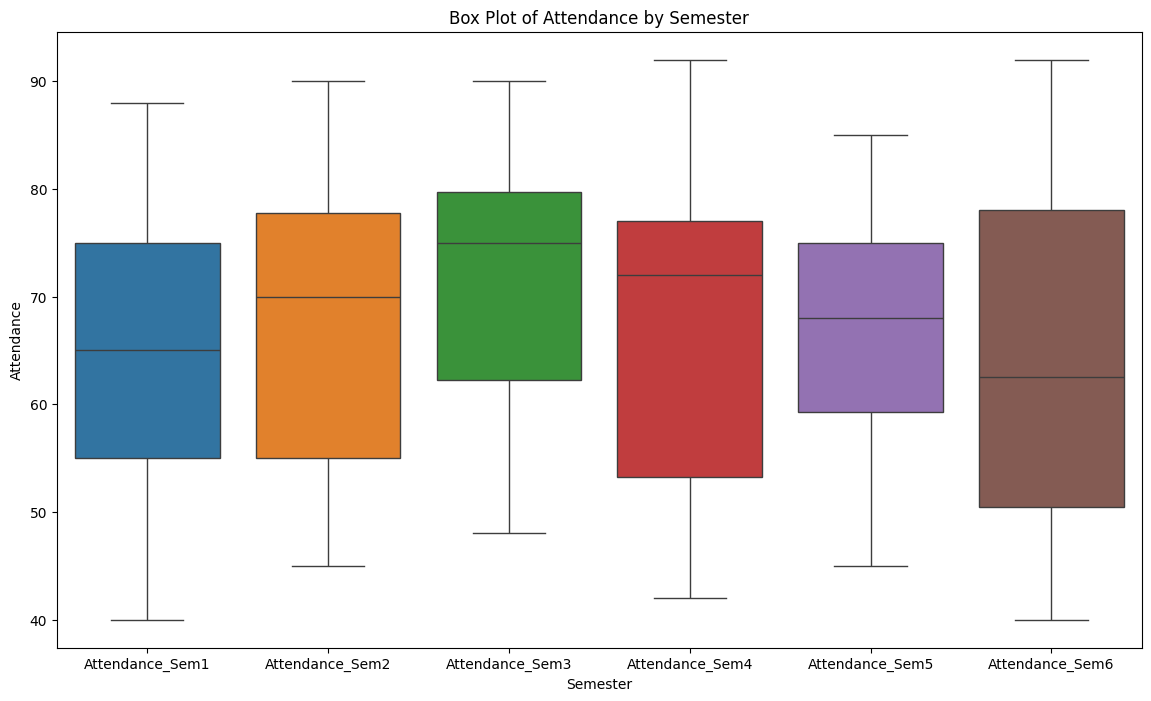

In [50]:
# Box plots for Attendance by semester
plt.figure(figsize=(14, 8))
sns.boxplot(data=dataset[['Attendance_Sem1', 'Attendance_Sem2', 'Attendance_Sem3', 'Attendance_Sem4', 'Attendance_Sem5', 'Attendance_Sem6']])
plt.title('Box Plot of Attendance by Semester')
plt.xlabel('Semester')
plt.ylabel('Attendance')
plt.show()

### scatter plots

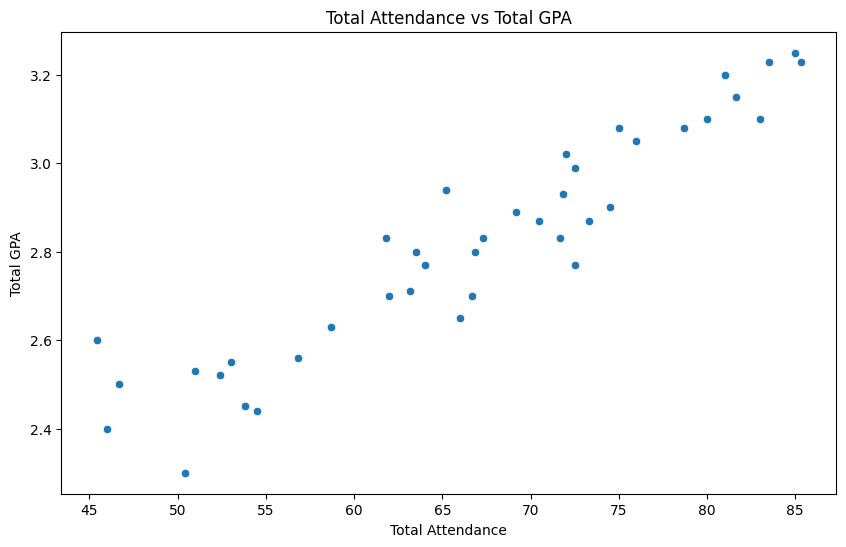

In [51]:
# Scatter plot for Total Attendance vs Total GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Attendance', y='Total_GPA', data=dataset)
plt.title('Total Attendance vs Total GPA')
plt.xlabel('Total Attendance')
plt.ylabel('Total GPA')
plt.show()

## Feature Importance

### Feature Importances Plot

In [52]:
# selecting relevant features and target variable
features = ['Semester1_Marks', 'Semester2_Marks', 'Semester3_Marks', 'Semester4_Marks', 
            'Semester5_Marks', 'Semester6_Marks', 'Attendance_Sem1', 'Attendance_Sem2', 
            'Attendance_Sem3', 'Attendance_Sem4', 'Attendance_Sem5', 'Attendance_Sem6']
target = 'Total_GPA'


In [53]:
# defining X and y
X = dataset[features]
y = dataset[target]


In [54]:
#splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# training the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# Standardizing the features if necessary 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# getting the feature importances
feature_importances = rf.feature_importances_


In [58]:
# creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

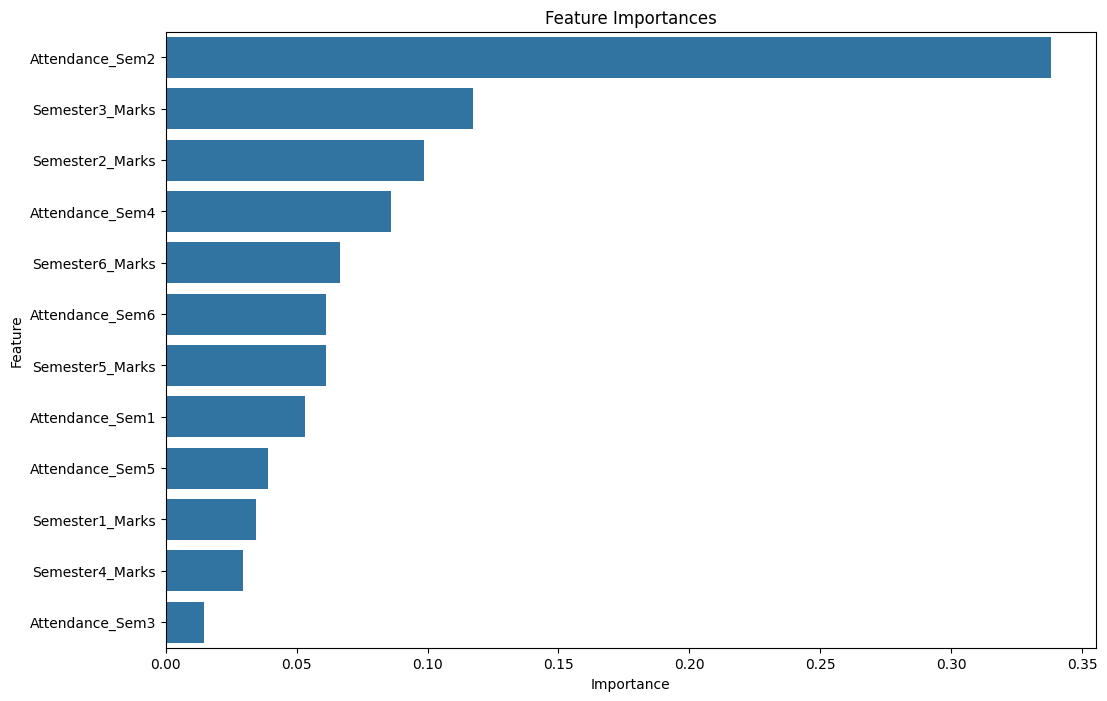

In [59]:
# plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [60]:
joblib.dump(rf, 'student_performance_model.pkl')

['student_performance_model.pkl']

In [61]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [62]:
# Save the cleaned dataset to CSV
output_file_path = '/Users/snehaaadhikari/Desktop/thesis/data/cleaned_students_data.csv'
dataset.to_csv(output_file_path, index=False)